# Problem 1
HIV is a virus that infects T-cells. A virus creates more viruses, by using a cells natural processes to make new cells. T-cells are in charge of teaching the immune system how to fight new diseases. When there is a huge loss of T-cells, that is AIDS. When someone has AIDS they die easily from other diseases like the common cold.


# Problem 2

AIDS can be treated by increasing the number of CD4 + T.

# Problem 3

In [72]:
# Dependencies for this lab✬s code:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#Code from RK4 Lab with minor edits
def initialize_all(y0, t0, t, n):
    """ An initialization routine for the different ODE solving
    methods in the lab. This initializes Y, T, and h. """
    if isinstance(y0, np.ndarray):
        Y = np.empty((n, y0.size)).squeeze()
    else:
        Y = np.empty(n)
    Y[0] = y0
    T = np.linspace(t0, t, n)
    h = float(t - t0) / (n - 1)
    return Y, T, h
def RK4(f, y0, t0, t, n):
    """ Use the RK4 method to compute an approximate solution
    to the ODE y✬ = f(t, y) at n equispaced parameter values from t0 to t
    with initial conditions y(t0) = y0.
    y0 is assumed to be either a constant or a one-dimensional numpy array.
    t and t0 are assumed to be constants.
    f is assumed to accept three arguments.
    The first is a constant giving the value of t.
    The second is a one-dimensional numpy array of the same size as y.
    The third is an index to the other arrays.
    This function returns an array Y of shape (n,) if
    y is a constant or an array of size 1.
    It returns an array of shape (n, y.size) otherwise.
    In either case, Y[i] is the approximate value of y at
    the i✬th value of np.linspace(t0, t, n).
    """
    Y,T,h = initialize_all(y0,t0,t,n)
    for i in xrange(n-1):
        K1 = f(T[i],Y[i],i)
        K2 = f(T[i]+h/2.,Y[i]+h/2.*K1,i)
        K3 = f(T[i]+h/2.,Y[i]+h/2.*K2,i)
        K4 = f(T[i+1],Y[i]+h*K3,i)
        Y[i+1] = Y[i] + h/6.*(K1+2*K2 +2*K3+K4)
    return Y

In [73]:
a_1, a_2 = 0, 0
b_1, b_2 = 0.02, 0.9
s_1, s_2 = 2., 1.5
mu = 0.002
k = 0.000025
g = 30.
c = 0.007
B_1, B_2 = 14, 1
A_1, A_2 = 250000, 75
T0, V0 = 400, 3
t_f = 50
n = 1000

In [74]:
# initialize global variables, state, costate, and u.
state = np.zeros((n,2))
state0 = np.array([T0, V0])
costate = np.zeros((n,2))
costate0 = np.zeros(2)
u=np.zeros((n,2))
u[:,0] += .02
u[:,1] += .9
# define state equations
def state_equations(t,y,i):
    """
    Parameters
    ---------------
    t : float
    the time
    y : ndarray (2,)
    the T cell concentration and the Virus concentration at time t
    i : int
    index for the global variable u.
    Returns
    --------------
    y_dot : ndarray (2,)
    the derivative of the T cell concentration and the virus
    concentration at time t
    """
    T,V = y
    T_prime = s_1 - s_2*V/(B_1 + V) - mu*T - k*V*T + u[i][0]*T
    V_prime = g*V/(B_2 + V) * (1-u[i][1]) - c*V*T
    y_dot = np.array(T_prime,V_prime)
    return y_dot

# Problem 4

In [75]:
def lambda_hat(t,y,i):
    """
    Parameters
    ---------------
    t : float
    the time
    y : ndarray (2,)
    the lambda_hat values at time t
    i : int
    index for global variables, u and state.
    Returns
    --------------
    y_dot : ndarray (2,)
    the derivative of the lambda_hats at time t.
    """
    T = state[:,0]
    V = state[:,1]
    lam1,lam2 = y
    lam1_prime = lam1*(-mu-k*V[n-i-1] + u[n-i-1][0]) - c*lam2*V[n-i-1]-1
    lam2_prime = -lam1*(s_2*B_1/(B_1 + V[n-i-1])**2 + k*T[n-i-1])+lam2*(g*B_2*(1-u[n-i-1][1])/(B_2 + V[n-i-1])**2 - c*T[n-i-1])
    y_dot = np.array([lam1_prime,lam2_prime])
    return y_dot

# Problem 5 

In [76]:
epsilon = 0.001
test = epsilon + 1
u = np.zeros((n,2))
while(test > epsilon):
    oldu = u.copy();
    #solve the state equations with forward iteration
    state = RK4(state_equations,state0,T0,t_f,n)
    T = state[:,0]
    V = state[:,1]
    #solve the costate equations with backwards iteration
    costate = RK4(lambda_hat,costate0,T0,t_f,n)[::-1]

    lam1 = costate[:,0]
    lam2 = costate[:,1]
    u1_star = np.minimum(np.maximum(a_1,-1./2*A_1 * (lam1*T)),b_1)
    u2_star = np.minimum(np.maximum(a_1,1./2*A_2 * (lam2 * g*V/(B_2 +V))),b_1)
    #update control
    u[:,0] = 0.5*(u1_star + oldu[:,0])
    u[:,1] = 0.5*(u2_star + oldu[:,1])
    #test for convergence
    test = abs(oldu - u).sum()



/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: overflow encountered in add
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in multiply
/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in multiply


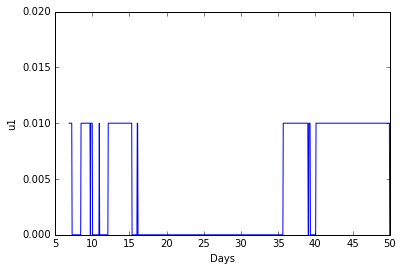

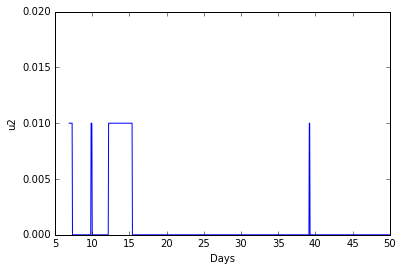

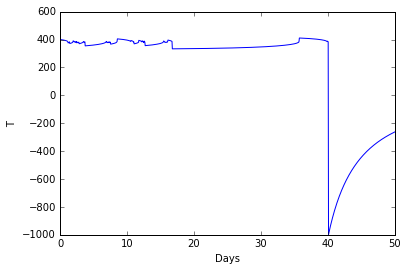

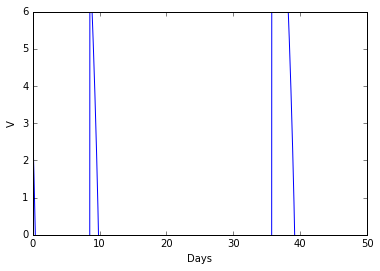

In [77]:
u1 = u[:,0]
u2 = u[:,1]
parts = np.shape(u)[0]
X = np.linspace(0,50,1000)

#plt.subplot(211)
plt.plot(X,u1)
plt.ylim(0,0.02)
plt.xlabel("Days")
plt.ylabel("u1")
plt.show()

#plt.subplot(121)
plt.plot(X,u2)
plt.xlabel("Days")
plt.ylabel("u2")
plt.ylim(0,0.02)
plt.show()

plt.plot(X,T)
plt.xlabel("Days")
plt.ylabel("T")
#plt.ylim(0,0)
plt.show()

plt.plot(X,V)
plt.xlabel("Days")
plt.ylabel("V")
plt.ylim(0,6)
plt.show()